**Partons du principe que l'on a une série de Html dans le dossier toto**

In [15]:
import glob
liste_fichiers = glob.glob("fichiers/*")

In [16]:
#TODO: ajouter install inscriptis
import inscriptis
res_inscriptis = {}
for chemin in liste_fichiers:
    f = open(chemin)
    contenu = f.read()
    f.close()
    res_inscriptis[chemin] = inscriptis.get_text(contenu)

In [17]:
print(res[:250])

Aller au contenu
      Menu
      Abonnez-vous 1€ le premier mois Rechercher
          Notre application
        Soyez alerté en temps réel
        avec l'application Le Figaro

        Rubriques et services du Figaro

          * Politique
         


**On peut voir qu'Inscriptis ressort beaucoup de contenu puisqu'il intègre les menus**
**Nous allons avoir un outil un peu plus perfectionné**

In [18]:
#TODO: install boilerpy
from boilerpy3 import extractors
res_boilerpy3 = {}
for chemin in liste_fichiers:
    f = open(chemin)
    contenu = f.read()
    f.close()
    BP_extractor = extractors.DefaultExtractor()
    res = BP_extractor.get_content(contenu)
    res_boilerpy3[chemin] = res

In [35]:
print(res[:250])

Réservé aux abonnés
Comment les microbes ont participé à la chute de l’Empire romain
DÉCRYPTAGE - Dans un livre rédigé bien avant le Covid, l’historien américain Kyle Harper, spécialiste de l’Antiquité tardive, estime que la nature a eu sa part de re


**On va essaye de visualiser la différence entre les deux fichiers pour mieux comprendre tout ça**

In [23]:
##TODO: faire scipy spatial
def distance_jaccard_simple(l1, l2):
    voc1 = set(l1.split())
    voc2 = set(l2.split())
    inter = voc1.intersection(voc2)
    union = voc1.union(voc2)
    if len(union)!=0:
        jaccard = len(inter)/len(union)
    else:
        jaccard = 1
    return jaccard

In [36]:
## On va comparer fichier les deux sorties res_inscriptis et res_boilerpy3
import re
matrixes = {}

for name in liste_fichiers:
    lignes1 = re.split("\n", res_inscriptis[name])
    lignes2 = re.split("\n", res_boilerpy3[name])
    matrix = [ [1]*len(lignes2) for i in range(len(lignes1))]
    for i in range(len(lignes1)):
        for j in range(len(lignes2)):
            jaccard = distance_jaccard_simple(lignes1[i], lignes2[j])
            matrix[i][j] = jaccard
    matrixes[name] = matrix

# on affiche les 5 premières lignes d'une matrice
for ligne in matrix[:5]:
    print(ligne)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012658227848101266, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.02564102564102564, 0.0, 0.0, 0.0, 0.0, 0.012195121951219513, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.1111111111111111, 0.0, 0.0, 0.1111111111111111, 0.0, 0.02702702702702703, 0.0, 0.0, 0.0, 0.1111111111111111, 0.043478260869565216, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.012345679012345678, 0.0, 0.01639344262295082, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.045454545454545456, 0.0, 0.0, 0.0]


In [27]:
##Constat: beaucoup de zéros
import pandas as pd
df = pd.DataFrame(matrix)
print(df)#bien lisible

      0    1         2    3    4    5    6         7    8         9   ...  \
0    0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.012658  0.0  0.000000  ...   
1    0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   
2    0.0  0.0  0.025641  0.0  0.0  0.0  0.0  0.012195  0.0  0.000000  ...   
3    0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   
4    0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.012346  0.0  0.016393  ...   
..   ...  ...       ...  ...  ...  ...  ...       ...  ...       ...  ...   
367  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   
368  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   
369  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   
370  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   
371  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.000000  ...   

      17        18   19   20   21        22        23   24   25   26  
0   

Text(33.0, 0.5, 'inscriptis')

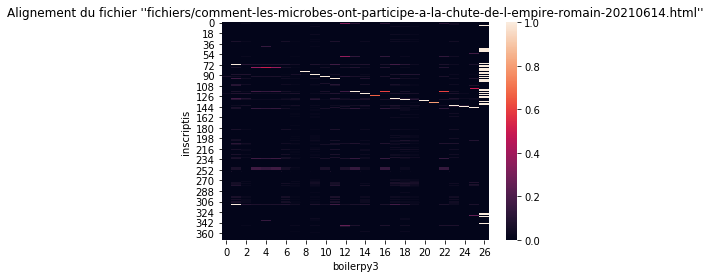

In [37]:
import numpy as np
import seaborn as sns
ax = sns.heatmap(matrix)
ax.set_title(f"Alignement du fichier ''{name}''")
ax.set_xlabel("boilerpy3")
ax.set_ylabel("inscriptis")


In [38]:
### arriver plus vite ici
## explicter le schéma
##intégrer santize
## montrer les X résultats du dossier "fichiers"
##montrer une autre source où l'alignement


In [ ]:
##créer uen focntion compare
##comp avec trafilatura
##comparaison sur lignes courtes et longues
##réf le deux Barbaresi/Lejeune WAC ("éval) article d'hypotheses